In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
df= pd.read_csv('D://NeuronetiX/Hac/cause_of_deaths.csv')

In [8]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Country/Territory                           6120 non-null   object        
 1   Code                                        6120 non-null   object        
 2   Year                                        6120 non-null   datetime64[ns]
 3   Meningitis                                  6120 non-null   int64         
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64         
 5   Parkinson's Disease                         6120 non-null   int64         
 6   Nutritional Deficiencies                    6120 non-null   int64         
 7   Malaria                                     6120 non-null   int64         
 8   Drowning                                    6120 non-null   int64         
 9   Interper

In [10]:
# Basic Stats

In [11]:
disease_columns=["Meningitis", "Alzheimer's Disease and Other Dementias", "Parkinson's Disease","Nutritional Deficiencies","Malaria", "Drowning", 
"Interpersonal Violence","Maternal Disorders", "HIV/AIDS", "Drug Use Disorders","Tuberculosis", "Cardiovascular Diseases",
"Lower Respiratory Infections","Neonatal Disorders", "Alcohol Use Disorders","Self-harm","Exposure to Forces of Nature", "Diarrheal Diseases",       
 "Environmental Heat and Cold Exposure","Neoplasms", "Conflict and Terrorism","Diabetes Mellitus","Chronic Kidney Disease",
"Poisonings","Protein-Energy Malnutrition", "Road Injuries","Chronic Respiratory Diseases",
"Cirrhosis and Other Chronic Liver Diseases", "Digestive Diseases","Fire, Heat, and Hot Substances", "Acute Hepatitis"]  
disease_df=df[disease_columns]

In [12]:
disease_df.describe().T.style.bar(subset=["mean","max"], color='#205ff2') \
                        .background_gradient(subset=['std'], cmap='Reds') \
                        .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Meningitis,6120.000000,1719.701307,6672.006930,0.000000,15.000000,109.000000,847.250000,98358.000000
Alzheimer's Disease and Other Dementias,6120.000000,4864.189379,18220.659072,0.000000,90.000000,666.500000,2456.250000,320715.000000
Parkinson's Disease,6120.000000,1173.169118,4616.156238,0.000000,27.000000,164.000000,609.250000,76990.000000
Nutritional Deficiencies,6120.000000,2253.600000,10483.633601,0.000000,9.000000,119.000000,1167.250000,268223.000000
Malaria,6120.000000,4140.960131,18427.753137,0.000000,0.000000,0.000000,393.000000,280604.000000
Drowning,6120.000000,1683.333170,8877.018366,0.000000,34.000000,177.000000,698.000000,153773.000000
Interpersonal Violence,6120.000000,2083.797222,6917.006075,0.000000,40.000000,265.000000,877.000000,69640.000000
Maternal Disorders,6120.000000,1262.589216,6057.973183,0.000000,5.000000,54.000000,734.000000,107929.000000
HIV/AIDS,6120.000000,5941.898529,21011.962487,0.000000,11.000000,136.000000,1879.000000,305491.000000
Drug Use Disorders,6120.000000,434.006699,2898.761628,0.000000,3.000000,20.000000,129.000000,65717.000000


In [13]:
#Subplots showing total deaths by each cause over time 


grouped_df['Year'] = grouped_df.index.year

cmap = plt.colormaps.get_cmap('tab20') 
n_colors_needed = len(disease_columns)
colors = [cmap(i % cmap.N) for i in range(n_colors_needed)]  

num_columns = 3
num_rows = (len(disease_columns) + num_columns - 1) // num_columns  

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows), sharex=False)  
axs = axs.flatten()  

label_interval = 5  

for i, disease in enumerate(disease_columns):
    axs[i].plot(grouped_df['Year'], grouped_df[disease], color=colors[i], linewidth=2.5)  
    axs[i].set_title(disease, fontsize=12, fontweight='bold')
    axs[i].set_ylabel('Total Deaths', fontsize=10, fontweight='bold')

    ticks = grouped_df['Year'][::label_interval] 
    axs[i].set_xticks(ticks)  
    axs[i].set_xticklabels(ticks, rotation=45, fontsize=10)  

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.tight_layout(rect=[0, 0, 0.9, 1])  

NameError: name 'grouped_df' is not defined

In [116]:
numeric_df = df.select_dtypes(include='number')
df_aggregated = numeric_df.groupby(df['Country/Territory']).sum()

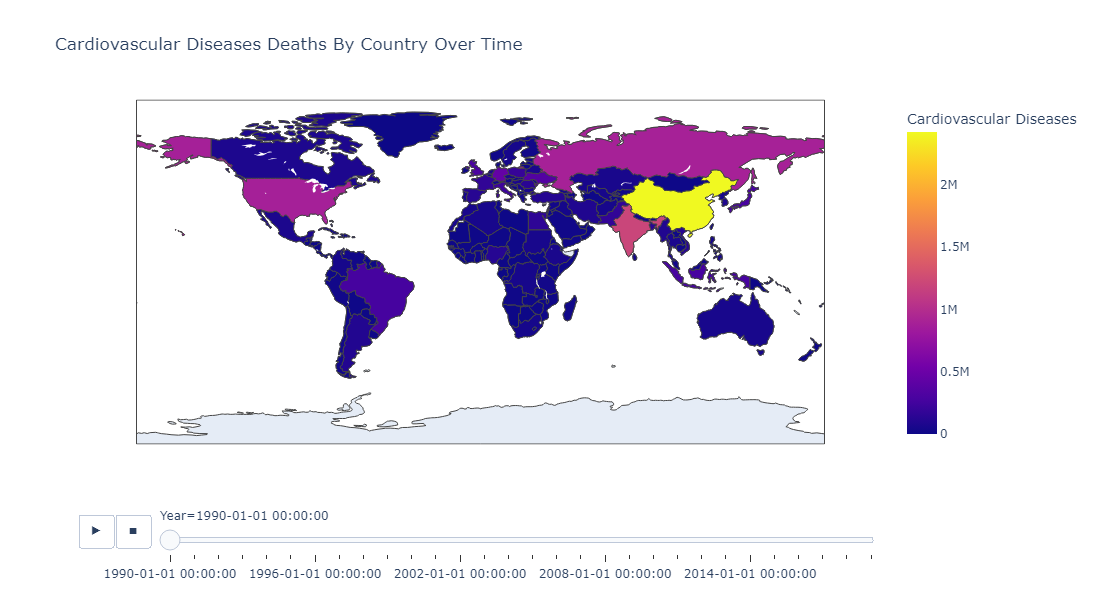

In [134]:
fig = px.choropleth(df, 
                    locations="Country/Territory",
                    locationmode="country names",
                    color="Cardiovascular Diseases",
                    hover_name="Country/Territory",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Cardiovascular Diseases Deaths By Country Over Time", height = 600, width=1000)

fig.show()

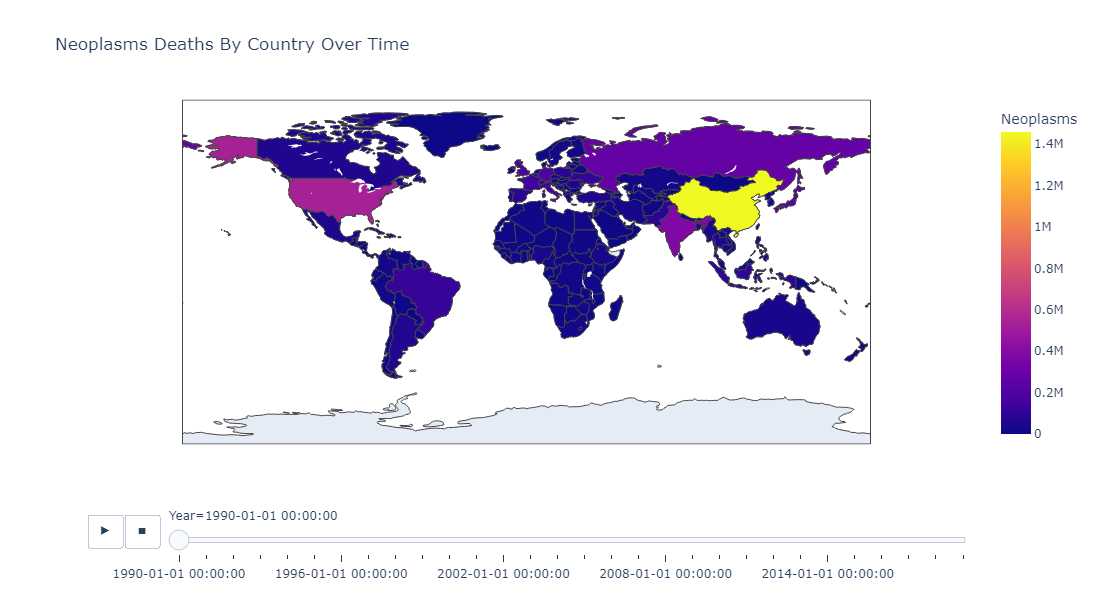

In [136]:
fig = px.choropleth(df, 
                    locations="Country/Territory",
                    locationmode="country names",
                    color="Neoplasms",
                    hover_name="Country/Territory",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Neoplasms Deaths By Country Over Time", height = 600, width=1000)

fig.show()

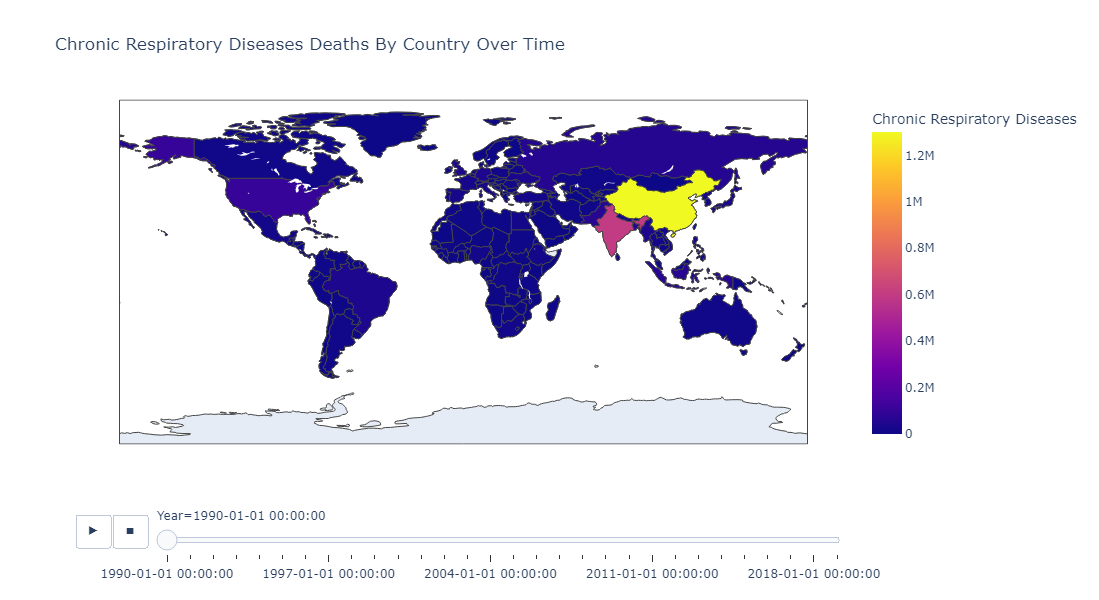

In [138]:
fig = px.choropleth(df, 
                    locations="Country/Territory",
                    locationmode="country names",
                    color="Chronic Respiratory Diseases",
                    hover_name="Country/Territory",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Chronic Respiratory Diseases Deaths By Country Over Time", height = 600, width=1000)

fig.show()